In [18]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:, [2, 3]]
y = iris.target

In [16]:
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [21]:
np.bincount(y)

array([50, 50, 50])

In [22]:
np.bincount(y_train)

array([35, 35, 35])

In [23]:
np.bincount(y_test)

array([15, 15, 15])

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [30]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [90]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [91]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" % (y_test != y_pred).sum())

Misclassified samples: 1


In [92]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [93]:
print("Accuracy: %.2f" % ppn.score(X_test_std, y_test))

Accuracy: 0.98


In [35]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [95]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ("d", "p", "s", "x", "o", "^", "v")
    colors = ("yellow", "purple", "pink", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot class examples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0],
                    X_test[:,1],
                    c="None",
                    edgecolor="black",
                    alpha=1.0,
                   linewidth=1,
                   marker="o",
                   s=100,
                   label="test_set")

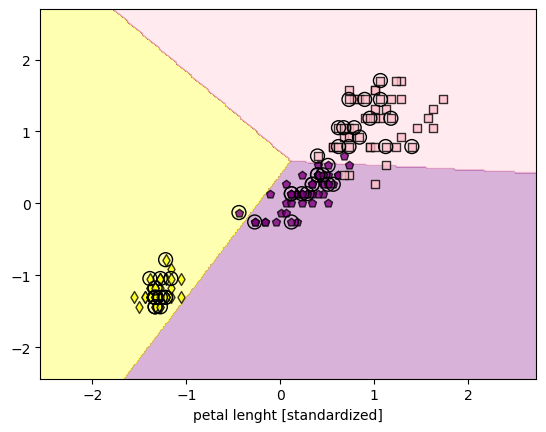

In [96]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel("petal lenght [standardized]")
plt.show()

In [100]:
from mlxtend.classifier import Adaline
ada = Adaline(epochs=10,
             eta=0.01,
             minibatches=1,
             random_seed=1)
ada.fit(X_train_std, y_train)

AttributeError: Labels not in {(0, 1)}.
Found (0, 1, 2)